In [5]:
import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt 
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = None
pd.options.display.max_columns = None
sns.set()

In [2]:
def wrangle (filename, encoding = None, dropna_columnnames = None, change_column_name= None, date_column= None, remove_duplicated_rows_columnsname = None):
    # Loading Data from csv file
    df = pd.read_csv(filename, encoding= encoding)

    ### Get Orders NaN Rows
    df.dropna(subset= dropna_columnnames, inplace=True)

    # Rename Columns
    df = df.rename(columns= change_column_name)
    
    # Change OrderDate and ID Columns type to Date, integer
    df[date_column] = pd.to_datetime(df[date_column])    

    #Drop dupliacted rows
    df = df.drop_duplicates(subset= remove_duplicated_rows_columnsname)

       
    #Strip and lowercase columns names
    df.columns = df.columns.str.strip().str.lower()
    
    return df

In [3]:
orders = wrangle('all_data.csv', encoding= 'latin-1' , dropna_columnnames= ['OrderID'], change_column_name= {'City.1' : 'SuppCity', 'Country.1' : 'SuppCountry', 'Phone.1' : 'Supp_Phone'}, date_column= 'OrderDate', remove_duplicated_rows_columnsname= ['OrderID'])

for cols in orders.columns:
    if 'ID' in cols or 'OrderNumber' in cols:
         orders[cols] = orders[cols].astype(int)

orders = orders[['customerid', 'firstname', 'lastname', 'city', 'country', 'orderid', 'ordernumber', 'orderdate', 'totalamount' ]]
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 830 entries, 0 to 2130
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customerid   830 non-null    float64       
 1   firstname    830 non-null    object        
 2   lastname     830 non-null    object        
 3   city         830 non-null    object        
 4   country      830 non-null    object        
 5   orderid      830 non-null    float64       
 6   ordernumber  830 non-null    float64       
 7   orderdate    830 non-null    datetime64[ns]
 8   totalamount  830 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 64.8+ KB


In [4]:
orders.totalamount.describe()

count      830.00
mean     1,631.88
std      1,990.61
min         12.50
25%        480.00
50%      1,015.90
75%      2,028.65
max     17,250.00
Name: totalamount, dtype: float64

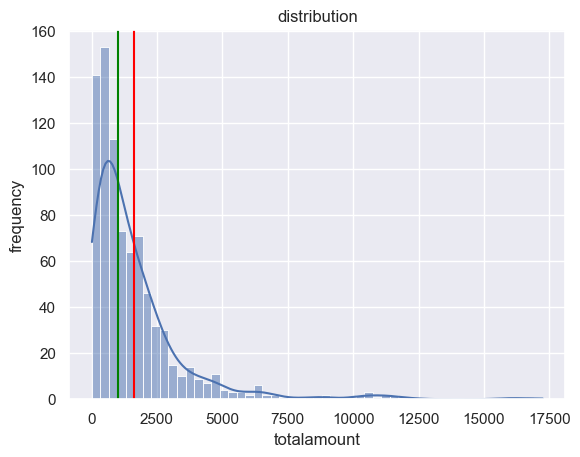

In [8]:
#data shape:
sns.histplot(data=orders,x='totalamount',kde=True)
plt.title('distribution')
plt.xlabel('totalamount')
plt.ylabel('frequency')
plt.axvline(orders.totalamount.median(),color='green')
plt.axvline(orders.totalamount.mean(),color='red')

In [9]:
min_=orders.totalamount.min()
q1=orders.totalamount.quantile(0.25)
q2=orders.totalamount.median()
q3=orders.totalamount.quantile(0.75)
lb=
ub=



<Axes: xlabel='totalamount'>

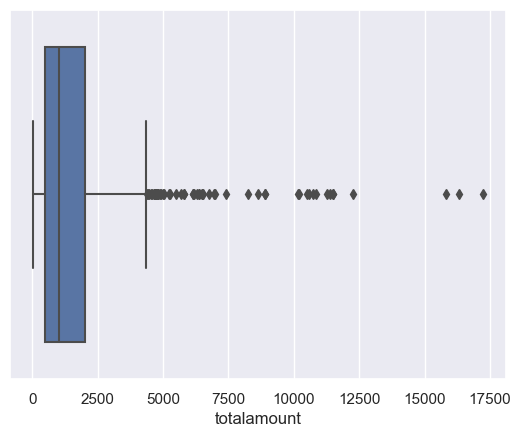

In [10]:
sns.boxplot(data=orders,x='totalamount')

In [11]:
px.box(data_frame=orders,x='totalamount')